# Iris Species Classification

### 1. Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

#importing the datasets module from the sklearn library
from sklearn import datasets

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

### 2. Dropping the Id column and encoding the Species column

In [4]:
df = df.drop(['Id'], axis=1)

In [5]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
data = df.copy()
data['species'] = enc.fit_transform(df['Species'])

### 3. Pairplot of the data

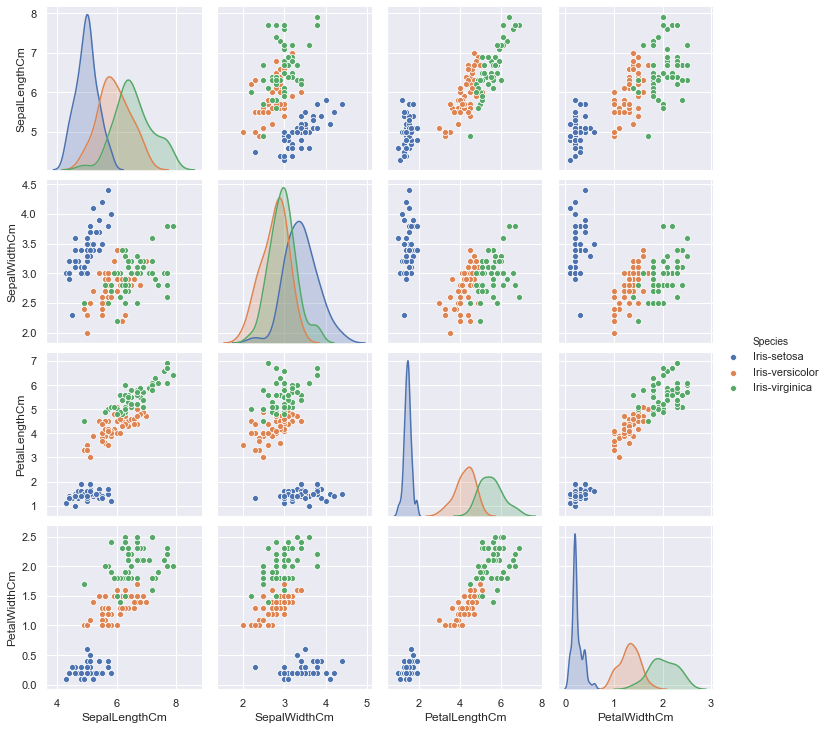

In [6]:
sns.pairplot(data.iloc[:,[0,1,2,3,4]],hue="Species")

### 4. Preparing the data

In [7]:
x = df.drop(['Species'], axis=1).to_numpy()

### 5. Determining The Optimal Number Of Clusters

In [8]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 365)
    
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

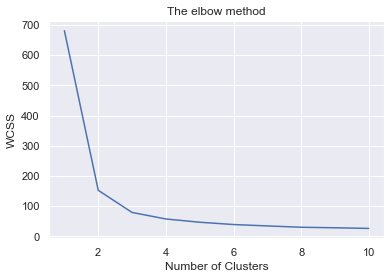

In [10]:
plt.plot(range(1,11), wcss)
plt.title("The elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

### 6. Applying KMeans to Classify the data

In [11]:
kmeans = KMeans(n_clusters = 3, random_state = 365)
y = kmeans.fit_predict(x)

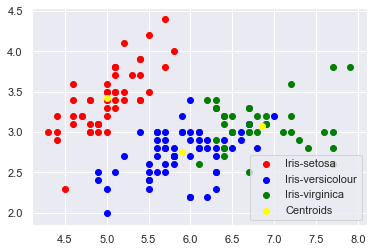

In [15]:
labels = ['Iris-setosa','Iris-versicolour','Iris-virginica']
colors = ['red','blue','green']

for i in range(3):
    plt.scatter(x[y==i,0], x[y==i,1], c=colors[i], label=labels[i])
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], c = 'yellow', label = 'Centroids')
plt.legend()

### 7. Finally pickle the classifier for our streamlit app

In [14]:
import pickle
pickle_out = open("kmeans.pkl","wb")
pickle.dump(kmeans, pickle_out)
pickle_out.close()